In [21]:
import sys
sys.path.append('../src')

import importlib
import dyn_accept_loop as dal
import logreg_augmented as lra
importlib.reload(dal)

import matplotlib.pyplot as plt

import lightgbm as lgbm
from sklearn.tree import DecisionTreeClassifier

import torch

## Test importable Dynamic Acceptance Loop

Itteration: 0) Accepted: 1754 | Denied: 4321 - New train set size: (16754, 68)
Itteration: 1) Accepted: 1819 | Denied: 4256 - New train set size: (18573, 68)
Itteration: 2) Accepted: 1822 | Denied: 4253 - New train set size: (20395, 68)
Itteration: 3) Accepted: 1776 | Denied: 4299 - New train set size: (22171, 68)
Itteration: 4) Accepted: 1759 | Denied: 4316 - New train set size: (23930, 68)
Itteration: 5) Accepted: 1777 | Denied: 4298 - New train set size: (25707, 68)
Itteration: 6) Accepted: 1678 | Denied: 4397 - New train set size: (27385, 68)
Itteration: 7) Accepted: 1814 | Denied: 4261 - New train set size: (29199, 68)
Itteration: 8) Accepted: 1604 | Denied: 4471 - New train set size: (30803, 68)
Itteration: 9) Accepted: 1818 | Denied: 4257 - New train set size: (32621, 68)
Itteration: 10) Accepted: 1805 | Denied: 4270 - New train set size: (34426, 68)
Itteration: 11) Accepted: 1754 | Denied: 4321 - New train set size: (36180, 68)
Itteration: 12) Accepted: 1821 | Denied: 4254 - Ne

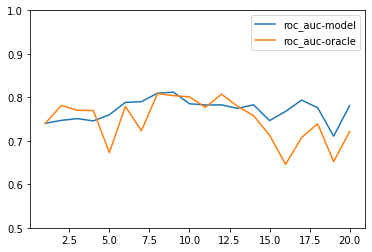

In [23]:
n_years = 20

sim = dal.Simulate_acceptance_loop("gmsc.csv", lgbm.LGBMClassifier(), 0.1, 0.1, n_years)
results_generator = sim.run()

metrics = None
for iteration in results_generator:
    print(f'Itteration: {iteration[0]}) Accepted: {iteration[1].count(True)} | Denied: {iteration[1].count(False)} - New train set size: {iteration[2]}')
    metrics = iteration[3]
    
x = range(1, n_years + 1)
plt.plot(x, metrics["model"]["holdout"]['roc_auc'], label = 'roc_auc-model')
plt.plot(x, metrics["oracle"]["holdout"]['roc_auc'], label = 'roc_auc-oracle')
#plt.plot(x, results["holdout"]['precision'], label = 'precision')
#plt.plot(x, results["holdout"]['f1'], label = 'f1')
#plt.plot(x, results["holdout"]['accuracy'], label = 'accuracy')
plt.legend()
plt.ylim([0.5, 1.0])
plt.show()

## Test importable Autoencoder

In [10]:
import autoencoder as aenc
import importlib
importlib.reload(aenc)

<module 'autoencoder' from 'c:\\Users\\haase.PAPMEIER\\InfSys\\reject-infer-autoencoder\\notebooks\\../src\\autoencoder.py'>

Autoencoder(
  (enc): ModuleList(
    (0): Linear(in_features=68, out_features=15, bias=True)
    (1): Linear(in_features=15, out_features=3, bias=True)
  )
  (dec): ModuleList(
    (0): Linear(in_features=3, out_features=30, bias=True)
    (1): Linear(in_features=30, out_features=68, bias=True)
  )
)
Epoch 1 of 50, Train Loss: 0.936
Epoch 2 of 50, Train Loss: 0.827
Epoch 3 of 50, Train Loss: 0.783
Epoch 4 of 50, Train Loss: 0.758
Epoch 5 of 50, Train Loss: 0.742
Epoch 6 of 50, Train Loss: 0.732
Epoch 7 of 50, Train Loss: 0.725
Epoch 8 of 50, Train Loss: 0.719
Epoch 9 of 50, Train Loss: 0.717
Epoch 10 of 50, Train Loss: 0.715
Epoch 11 of 50, Train Loss: 0.714
Epoch 12 of 50, Train Loss: 0.713
Epoch 13 of 50, Train Loss: 0.712
Epoch 14 of 50, Train Loss: 0.711
Epoch 15 of 50, Train Loss: 0.710
Epoch 16 of 50, Train Loss: 0.710
Epoch 17 of 50, Train Loss: 0.709
Epoch 18 of 50, Train Loss: 0.708
Epoch 19 of 50, Train Loss: 0.707
Epoch 20 of 50, Train Loss: 0.707
Epoch 21 of 50, Train Loss

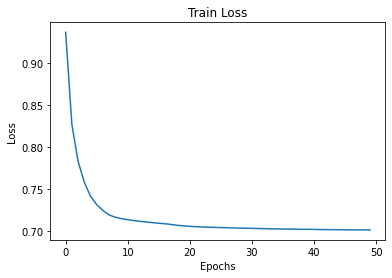

In [11]:
BATCH_SIZE = 1000
EPOCHS = 50

dataset = aenc.CreditscoringDataset("gmsc.csv")      # load and prepare Dataset to Tensor
data_loader = aenc.DataLoader(                       # create Dataloader for batching
    dataset, 
    batch_size=BATCH_SIZE,
    shuffle=True
)

shape = [dataset.x.shape[1], 15, 3, 30, dataset.x.shape[1]]  # define shape of Autoencoder
net = aenc.Autoencoder(shape)
print(net)
net.to("cpu")

train_loss = aenc.train(net, data_loader, EPOCHS)               

plt.figure()
plt.plot(train_loss)
plt.title('Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [12]:
# Use trained Autoencoder
net.encode(torch.rand(10, 68))

tensor([[1.8711, 3.8018, 2.0466],
        [4.0706, 7.7197, 6.6059],
        [4.2349, 7.1699, 6.1570],
        [3.9670, 6.4209, 5.9034],
        [3.2974, 6.5173, 4.1802],
        [2.9657, 5.0645, 3.9191],
        [3.7741, 6.4693, 4.1531],
        [4.3032, 8.3199, 6.6663],
        [3.2013, 6.3836, 4.7138],
        [4.2503, 7.5844, 6.1326]], grad_fn=<ReluBackward0>)